# TUBERCULOSIS TREATMENT EFFECT USING MACHINE LEARNING 

![tuberculosis](tuberculosis.jpg)

## BUILDING A MODEL TO TEST THE EFFECTIVENESS OF TREATMENT ON TUBERCULOSIS

### THE MODEL WILL BE BUILT USING 4 DIFFERENT ALGORITHMS:
### - LOGISTIC REGRESSION
### - K NEAREST NEIGHBOUR
### - SUPPORT VECTOR MACHINE (SVM)
### - RANDOM FOREST 

## Importing necessary libraries

In [1]:
from math import floor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### READING IN THE DATASETS

In [2]:
specimen_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Specimen_January_2022.csv')
specimen_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Specimen_January_2023.csv')
regimens_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Regimens_January_2022.csv')
regimens_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Regimens_January_2023.csv')
patients_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Patient_Cases_January_2022.csv')
patients_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Patient_Cases_January_2023.csv')
patients_nig = pd.read_csv('Tuberculosis files/TB_Data_Nigeria.csv')

#### Making copies of the datasets

In [3]:
patients_2022_copy = patients_2022.copy()
patients_2023_copy = patients_2023.copy()

specimens_2022_copy = specimen_2022.copy()
specimens_2023_copy = specimen_2022.copy()

regimens_2022_copy = regimens_2022.copy()
regimens_2023_copy = regimens_2023.copy()

patients_nig_copy = patients_nig.copy()

In [4]:
# Checking the info about the 2022 patients data
patients_2022_copy.info()
patients_column_list_2022 = patients_2022.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Columns: 204 entries, condition_id to qure_atelectasis
dtypes: float64(6), int64(5), object(193)
memory usage: 10.3+ MB


#### Selecting useful columns from the patients datasets

In [5]:
patients_column_list_2022
patients_column_list_needed = ['patient_id',
 'identifier',
 'registration_date',
 'age_of_onset',
 'gender',
 'country',
 'education',
 'employment',
 'number_of_children',
 'number_of_daily_contacts',
 'case_definition',
 'diagnosis_code',
 'type_of_resistance',
 'bmi',
 'lung_localization',
 'x_ray_count',
 'status']

patients_2022_new = patients_2022_copy[patients_column_list_needed]

patients_2022_new

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,case_definition,diagnosis_code,type_of_resistance,bmi,lung_localization,x_ray_count,status
0,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,final
1,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,New,A15.1,Sensitive,18.6,Pulmonary,1,final
2,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0.0,1.0,Failure,A15.0,MDR non XDR,24.5,Pulmonary,1,final
3,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,NaN,1.0,Failure,A19.8,XDR,22.3,Pulmonary,1,final
4,79bf51ab-76ea-4bab-a3ab-bef40f1b618e,4195,2019,58,Male,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,00ac6a80-f27f-41c2-8c03-7d86d53d50db,8872,2019,33,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,2.0,3.0,New,A15.1,Poly DR,16.2,Pulmonary,1,final
6592,a32e3d5d-4e08-4461-8082-e850b1f7bdfe,9902,2021,17,Male,Ukraine,Basic school (incl. primary),Unemployed,NaN,NaN,New,A19.8,Sensitive,14.3,Pulmonary,1,final
6593,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2.0,3.0,New,A16.0,Mono DR,21.1,Pulmonary,1,final
6594,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,Other,A15.0,Sensitive,19.8,Pulmonary,1,final


#### Doing some necessary mathematics on the columns to cater for the missing values in some rows using the pandas fillna function 

In [6]:
patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].fillna(patients_2022_new['number_of_children'].sum()/len(patients_2022_new))
patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].fillna(patients_2022_new['number_of_daily_contacts'].sum()/len(patients_2022_new))
patients_2022_new['bmi'] = patients_2022_new['bmi'].fillna(patients_2022_new['bmi'].sum()/len(patients_2022_new))

patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].astype('int')
patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].astype('int')
patients_2022_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                6596 non-null   object 
 1   identifier                6596 non-null   int64  
 2   registration_date         6596 non-null   int64  
 3   age_of_onset              6596 non-null   int64  
 4   gender                    6596 non-null   object 
 5   country                   6596 non-null   object 
 6   education                 6596 non-null   object 
 7   employment                6596 non-null   object 
 8   number_of_children        6596 non-null   int32  
 9   number_of_daily_contacts  6596 non-null   int32  
 10  case_definition           6596 non-null   object 
 11  diagnosis_code            6596 non-null   object 
 12  type_of_resistance        6596 non-null   object 
 13  bmi                       6596 non-null   float64
 14  lung_loc

C:\Users\oyeni\AppData\Local\Temp\ipykernel_22856\3638707757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].fillna(patients_2022_new['number_of_children'].sum()/len(patients_2022_new))
C:\Users\oyeni\AppData\Local\Temp\ipykernel_22856\3638707757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].fillna(patients_2022_new['number_

#### Performing the same processes on the 2023 patients dataset

In [7]:
patients_2023_new = patients_2023_copy[patients_column_list_needed]

patients_2023_new

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,case_definition,diagnosis_code,type_of_resistance,bmi,lung_localization,x_ray_count,status
0,3676197e-6bd7-4c41-8bb0-de5889997b32,8277,2019,40,Male,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,final
1,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,final
2,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,New,A15.1,Sensitive,18.6,Pulmonary,1,final
3,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0.0,1.0,Failure,A15.0,MDR non XDR,24.5,Pulmonary,1,final
4,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,NaN,1.0,Failure,A19.8,XDR,22.3,Pulmonary,1,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2.0,3.0,New,A16.0,Mono DR,21.1,Pulmonary,1,final
8813,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,Other,A15.0,Sensitive,19.8,Pulmonary,1,final
8814,b03880ea-a373-4530-9959-657dff0be22d,9446,2021,37,Male,Ukraine,Not Reported,Unemployed,NaN,NaN,New,A15.0,MDR non XDR,23.8,Pulmonary,1,final
8815,3efbbff9-f475-4d40-9dce-c92aac275f44,8904,2021,44,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,2.0,3.0,Chronic TB,A15.0,MDR non XDR,16.7,Pulmonary,1,final


In [8]:
patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].fillna(floor(patients_2023_new['number_of_children'].sum()/len(patients_2023_new)))
patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].fillna(floor(patients_2023_new['number_of_daily_contacts'].sum()/len(patients_2023_new)))
patients_2023_new['bmi'] = patients_2023_new['bmi'].fillna(patients_2023_new['bmi'].sum()/len(patients_2023_new))


patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].astype('int')
patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].astype('int')
patients_2023_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                8817 non-null   object 
 1   identifier                8817 non-null   int64  
 2   registration_date         8817 non-null   int64  
 3   age_of_onset              8817 non-null   int64  
 4   gender                    8817 non-null   object 
 5   country                   8817 non-null   object 
 6   education                 8817 non-null   object 
 7   employment                8817 non-null   object 
 8   number_of_children        8817 non-null   int32  
 9   number_of_daily_contacts  8817 non-null   int32  
 10  case_definition           8817 non-null   object 
 11  diagnosis_code            8817 non-null   object 
 12  type_of_resistance        8817 non-null   object 
 13  bmi                       8817 non-null   float64
 14  lung_loc

C:\Users\oyeni\AppData\Local\Temp\ipykernel_22856\137417697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].fillna(floor(patients_2023_new['number_of_children'].sum()/len(patients_2023_new)))
C:\Users\oyeni\AppData\Local\Temp\ipykernel_22856\137417697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].fillna(floor(patients_2023_n

In [9]:
# converting the columns to list format
regimens_2022_copy.info()
regimens_column_list_2022 = regimens_2022.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  9644 non-null   object 
 1   condition_id                9644 non-null   object 
 2   period_start                9644 non-null   float64
 3   period_end                  8677 non-null   float64
 4   period_span                 8677 non-null   float64
 5   outcome_cd                  9643 non-null   object 
 6   activities_period_start     9644 non-null   float64
 7   activities_period_end       8896 non-null   float64
 8   activities_statusreason_cd  7382 non-null   object 
 9   regimen_drug                9644 non-null   object 
 10  dose                        30 non-null     float64
 11  collected                   30 non-null     float64
 12  reinfusioned                30 non-null     float64
dtypes: float64(8), object(5)
memory u

#### Selecting the necessary columns from the regimens dataset

In [10]:
regimens_column_list_2022
regimens_column_list_needed = ['patient_id',
 'condition_id',
 'period_span',
 'regimen_drug',
 'outcome_cd']

regimens_2022_new = regimens_2022_copy[regimens_column_list_needed]

regimens_2022_new

,patient_id,condition_id,period_span,regimen_drug,outcome_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,764.0,"{Amx/Clv,Cm,Cs,Mfx,Pas,Pto}",failure
1,000bb53b-8f25-4d5c-9146-fbe84c5316ab,a112409a-cc77-4923-b6e2-dfef53449bde,NaN,"{Bdq,Cfz,Lzd,Mfx}",stillOnTreatment
2,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{E,H,R,S}",cured
3,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{H,R}",cured
4,0046f70e-395f-40bb-b3a7-57b3fe3e97d1,ff562387-8969-4e27-bdd1-3146f45ea588,588.0,"{Cfz,Cs,Lzd,Mfx,Pto,Z}",completed
...,...,...,...,...,...
9639,ffcdbf6f-53a3-453a-9582-8725ed4234f3,239bdca1-a72e-4ecb-a9d9-97900dfd1759,609.0,"{Cs,Lfx,Pas,Pto}",completed
9640,ffd914a0-89dd-4a7e-a959-0342b3c43e20,38d66fbf-f2cf-49a8-9091-c76600af364b,188.0,"{Bdq,Cfz,Cs,Dld,Lzd}",failure
9641,ffdf3b67-bba2-4d0b-937d-fae6b75d4f63,a1aa80b9-bb80-40ef-9136-4fcc0580795f,278.0,"{E,H,Lfx,R,Z}",completed
9642,fff9f70e-2738-43c9-b42d-0c2139da52b9,728694fa-f21a-4055-b1f1-1580b1a9cf8a,38.0,"{Cm,E,H}",died


In [11]:
regimens_2022_new.fillna(0,inplace=True)

C:\Users\oyeni\AppData\Local\Temp\ipykernel_22856\3917202655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regimens_2022_new.fillna(0,inplace=True)


In [12]:
regimens_2023_new = regimens_2023_copy[regimens_column_list_needed]

regimens_2023_new

,patient_id,condition_id,period_span,regimen_drug,outcome_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,764.0,"{Amx/Clv,Cm,Cs,Mfx,Pas,Pto}",failure
1,000bb53b-8f25-4d5c-9146-fbe84c5316ab,a112409a-cc77-4923-b6e2-dfef53449bde,NaN,"{Bdq,Cfz,Lzd,Mfx}",stillOnTreatment
2,0027b572-338f-443e-b281-a0a0a2bbcda1,fc4a8d34-fa79-45af-93fa-7e2b9c290181,183.0,"{E,H,R,Z}",completed
3,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{E,H,R,S}",cured
4,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{H,R}",cured
...,...,...,...,...,...
12780,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Cfz,Cm,E,H,Mfx,Pto,Z}",cured
12781,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Amx/Clv,Bdq,Cfz,Ipm/Cln,Lzd,Trd}",cured
12782,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Bdq,Cfz,Lzd}",cured
12783,ffff7e78-14af-415a-8f2e-82ae35e9f499,d593d898-ba1e-4b8d-8f3c-95129253b01b,272.0,"{Bdq,Cfz,Cs,Lfx,Lzd}",cured


In [13]:
regimens_2023_new.fillna(0,inplace=True)

C:\Users\oyeni\AppData\Local\Temp\ipykernel_22856\3115858346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regimens_2023_new.fillna(0,inplace=True)


#### Merging the patients 2022 and regimens 2022 datasets together.

In [14]:
patients_total_2022 = pd.merge(patients_2022_new, regimens_2022_new, on='patient_id')

#### Adding a new column to the combined data based on existing columns

In [15]:
patients_total_2022['outcome_cd_state'] = patients_total_2022['outcome_cd'].apply(lambda x:'cured'\
if x == 'cured' else ('still on treatment' if x == 'stillOnTreatment' \
               else ("died" if x == 'died'\
                     else( 'failure' if x == 'failure'\
                          else('completed' if x == 'completed'\
                               else ('loss to follow up' if x == 'ltfu' else 'unknown'))))))

#### Doing the same process above to the patients 2023 and regimens 2023
- Merging DataFrames
- Renaming columns
- Adding new columns

In [16]:
patients_total_2023 = pd.merge(patients_2023_new, regimens_2023_new, on='patient_id')

In [17]:
patients_total_2023['outcome_cd_state'] = patients_total_2023['outcome_cd'].apply(lambda x:'cured'\
if x == 'cured' else ('still on treatment' if x == 'stillOnTreatment' \
               else ("died" if x == 'died'\
                     else( 'failure' if x == 'failure'\
                          else('completed' if x == 'completed'\
                               else ('loss to follow up' if x == 'ltfu' else 'unknown'))))))

In [18]:
patients_total_2022['year'] = 2022
patients_total_2023['year'] = 2023

#### Combining the two pre-combined data together **row-wise**

In [19]:
patients_total = pd.concat([patients_total_2022, patients_total_2023])

#### The Data has 7 unique outcomes namely:
    - cured
    - died
    - still on treatment
    - loss to follow up
    - failure
    - completed
    - unknown

In [20]:
patients_total['outcome_cd_state'].unique()

array(['cured', 'loss to follow up', 'completed', 'died',
       'still on treatment', 'failure', 'unknown'], dtype=object)

In [50]:
patients_total['outcome_cd_bin'] = patients_total['outcome_cd_state'].apply(lambda x: 1 if x == 'cured' \
                                                                                       else (0 if x == 'died' \
                                                                                            else (2 if x == 'still on treatment'\
                                                                                                  else(3 if x == 'completed'\
                                                                                                      else(4 if x == 'loss to follow up'\
                                                                                                          else(5 if x == 'failure' else 6))))))

#### A heatmap showing the correlation between the columns of the whole combined dataset

<AxesSubplot:>

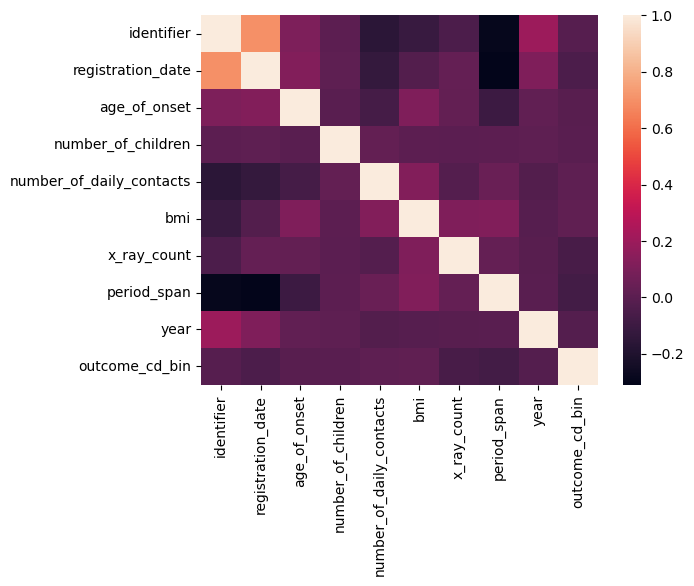

In [51]:
sns.heatmap(patients_total.corr())

In [52]:
patients_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23337 entries, 0 to 13239
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                23337 non-null  object 
 1   identifier                23337 non-null  int64  
 2   registration_date         23337 non-null  int64  
 3   age_of_onset              23337 non-null  int64  
 4   gender                    23337 non-null  object 
 5   country                   23337 non-null  object 
 6   education                 23337 non-null  object 
 7   employment                23337 non-null  object 
 8   number_of_children        23337 non-null  int32  
 9   number_of_daily_contacts  23337 non-null  int32  
 10  case_definition           23337 non-null  object 
 11  diagnosis_code            23337 non-null  object 
 12  type_of_resistance        23337 non-null  object 
 13  bmi                       23337 non-null  float64
 14  lung_l

In [53]:
columns_list = patients_total.columns

In [54]:
columns_list

Index(['patient_id', 'identifier', 'registration_date', 'age_of_onset',
       'gender', 'country', 'education', 'employment', 'number_of_children',
       'number_of_daily_contacts', 'case_definition', 'diagnosis_code',
       'type_of_resistance', 'bmi', 'lung_localization', 'x_ray_count',
       'status', 'condition_id', 'period_span', 'regimen_drug', 'outcome_cd',
       'outcome_cd_state', 'year', 'outcome_cd_bin'],
      dtype='object')

In [55]:
patients_total['regimen_drug'].unique()

array(['{E,H,R,Z}', '{Bdq,Cm,Cs,Lzd,Mfx,Z}',
       '{Amx/Clv,Bdq,Cm,Dld,Ipm/Cln,Lzd}', ...,
       '{Amx/Clv,Bdq,Cs,Dld,E,Ipm/Cln}', '{E,Lzd}', '{Bdq,Cfz,Dld,E,Pas}'],
      dtype=object)

### Feature selection...
- training features
- categorical features
- outcome

In [56]:
features = ['gender', 'country', 'education', 'employment',
                       'number_of_children', 'number_of_daily_contacts', 'type_of_resistance',
                      'lung_localization', 'x_ray_count', 'age_of_onset', 'bmi', 'period_span',
            'case_definition', 'status'
           ]
training_features = patients_total[features]

outcome = ['outcome_cd_bin']
outcome_label = patients_total[outcome]

In [57]:
categorical_columns = ['gender', 'country', 'education', 'employment',
                       'number_of_children', 'number_of_daily_contacts', 'type_of_resistance',
                      'lung_localization', 'x_ray_count', 'case_definition', 'status']

numerical_columns = ['age_of_onset', 'bmi', 'period_span']


### Scaling the numerical columns using the sklearn StandardScalar

In [58]:
ss = StandardScaler()
ss.fit(training_features[numerical_columns])
training_features[numerical_columns] = ss.transform(training_features[numerical_columns])
print('fitted_training features:')
training_features

fitted_training features:


C:\Users\oyeni\AppData\Local\Temp\ipykernel_22856\1298768005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features[numerical_columns] = ss.transform(training_features[numerical_columns])


,gender,country,education,employment,number_of_children,number_of_daily_contacts,type_of_resistance,lung_localization,x_ray_count,age_of_onset,bmi,period_span,case_definition,status
0,Female,Georgia,Not Reported,Unemployed,0,1,Sensitive,Pulmonary,1,-1.319428,-0.937117,-0.479000,New,final
1,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0,1,Sensitive,Pulmonary,1,0.456071,-0.193101,-0.425257,New,final
2,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0,1,MDR non XDR,Pulmonary,1,-1.248408,1.341298,0.403926,Failure,final
3,Male,Ukraine,College (bachelor),Unemployed,0,1,XDR,Pulmonary,1,-0.325148,0.769149,0.421841,Failure,final
4,Male,Georgia,Not Reported,Unemployed,0,1,Sensitive,Pulmonary,1,1.166271,-0.937117,-0.486678,New,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2,3,Mono DR,Pulmonary,1,-0.751268,0.457068,-0.944775,New,final
13236,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0,1,Sensitive,Pulmonary,1,-0.112088,0.118980,-0.499474,Other,final
13237,Male,Ukraine,Not Reported,Unemployed,0,1,MDR non XDR,Pulmonary,1,-0.325148,1.159250,-0.251231,New,final
13238,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,2,3,MDR non XDR,Pulmonary,1,0.171991,-0.687230,-0.919183,Chronic TB,final


In [59]:
training_features = pd.get_dummies(training_features,columns=categorical_columns)
training_features.head()

,age_of_onset,bmi,period_span,gender_Female,gender_Male,country_Azerbaijan,country_Belarus,country_China,country_Georgia,country_India,...,x_ray_count_16,case_definition_Chronic TB,case_definition_Failure,case_definition_Lost to follow up,case_definition_New,case_definition_Other,case_definition_Relapse,case_definition_Unknown,status_amended,status_final
0,-1.319428,-0.937117,-0.479000,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0.456071,-0.193101,-0.425257,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-1.248408,1.341298,0.403926,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.325148,0.769149,0.421841,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.166271,-0.937117,-0.486678,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [60]:
engineering_features = list(set(training_features.columns) - set(numerical_columns))
print('engineering features:')
engineering_features

engineering features:


['type_of_resistance_Poly DR',
 'case_definition_Failure',
 'x_ray_count_9',
 'lung_localization_Unknown',
 'x_ray_count_6',
 'number_of_children_1809',
 'x_ray_count_14',
 'type_of_resistance_MDR non XDR',
 'lung_localization_Pulmonary',
 'country_Romania',
 'x_ray_count_5',
 'x_ray_count_11',
 'number_of_children_8',
 'lung_localization_Pulmonary and Extrapulmonary',
 'number_of_daily_contacts_14',
 'case_definition_Chronic TB',
 'country_Belarus',
 'number_of_children_2',
 'number_of_daily_contacts_13',
 'education_No education',
 'employment_Retired',
 'type_of_resistance_Pre-XDR',
 'x_ray_count_2',
 'number_of_daily_contacts_15',
 'lung_localization_Extrapulmonary',
 'x_ray_count_12',
 'case_definition_New',
 'number_of_children_6',
 'type_of_resistance_Sensitive',
 'number_of_children_9',
 'country_Georgia',
 'number_of_daily_contacts_9',
 'employment_Disabled',
 'employment_Unemployed',
 'number_of_children_4',
 'employment_Not Reported',
 'number_of_daily_contacts_7',
 'number_

### Splitting the data into:
    - TRAINING and
    - TESTING
    data with 0.3 test size - 30%

In [61]:
x_train, x_test, y_train, y_test = train_test_split(training_features, outcome_label, test_size=0.3, random_state=30)
x_test

,age_of_onset,bmi,period_span,gender_Female,gender_Male,country_Azerbaijan,country_Belarus,country_China,country_Georgia,country_India,...,x_ray_count_16,case_definition_Chronic TB,case_definition_Failure,case_definition_Lost to follow up,case_definition_New,case_definition_Other,case_definition_Relapse,case_definition_Unknown,status_amended,status_final
9875,-0.893308,1.029217,-0.243553,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5103,-1.248408,-0.349142,-0.225639,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2629,-2.029627,-1.727500,-0.228198,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6741,-0.041068,0.275021,0.342505,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
11506,-0.680248,1.575359,-0.624875,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.029952,-0.245115,0.260611,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1477,0.811171,-0.937117,-0.898710,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1884,-0.183108,-0.937117,-0.604401,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
10253,-0.254128,-0.791257,-0.714447,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Logistic Regression model:
- is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.


In [62]:
lr = LogisticRegression()
model_lr = lr.fit(training_features,np.array(outcome_label['outcome_cd_bin']))
model_lr

C:\Users\oyeni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

accuracy score: 0.6770793161074689

classification report:
               precision    recall  f1-score   support

           0       0.51      0.32      0.39      2146
           1       0.70      0.95      0.81     12855
           2       0.81      0.93      0.87      1374
           3       0.65      0.27      0.38      2660

   micro avg       0.70      0.78      0.74     19035
   macro avg       0.67      0.62      0.61     19035
weighted avg       0.68      0.78      0.70     19035


confusion matrix:
 [[  680   864   116    49   264   100    73]
 [  174 12208    50   230    38   116    39]
 [   11    36  1278    22    11     0    16]
 [   52  1782    64   711    13     8    30]
 [  180  1141    36    17   381    70    68]
 [  156  1221    20    45    83   248    16]
 [   87   141    13    14    70     0   295]]

precison,recall,fscore,support ARRAYS:
 (array([0.50746269, 0.70189157, 0.81039949, 0.65349265, 0.44302326,
       0.45756458, 0.54934823]), array([0.31686859, 0.949669

<AxesSubplot:>

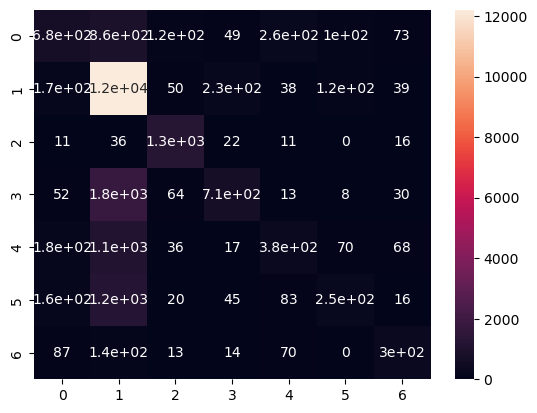

In [63]:
predicted_label  = model_lr.predict(training_features)
actual_label = np.array(outcome_label['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label, labels=[0,1,2,3]))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label,average='micro')
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label, average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm,annot=True)

#### Approximately 68% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [64]:
print('Accuracy on test dataset: ', accuracy_score(y_test, model_lr.predict(x_test)))

Accuracy on test dataset:  0.6730934018851756


- 67.3% accuracy on the test set.

### Random Forest model:
     is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of   decision trees at training time.
          It is also an estimator that fits a number of decision tree classifiers on various sub-samples of the data set and uses averaging to improve the predictive accuracy and control over-fitting.
     For classification tasks, the output of the random forest is the class selected by most trees

![random forest](RandomForestClassification.jpg)

In [65]:
rf = RandomForestClassifier()
model_rf = rf.fit(training_features,np.array(outcome_label['outcome_cd_bin']))

accuracy score: 0.994857950893431

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2146
           1       0.99      1.00      1.00     12855
           2       1.00      0.99      0.99      1374
           3       0.99      0.98      0.98      2660
           4       1.00      1.00      1.00      1893
           5       1.00      0.99      1.00      1789
           6       1.00      1.00      1.00       620

    accuracy                           0.99     23337
   macro avg       1.00      0.99      0.99     23337
weighted avg       0.99      0.99      0.99     23337


confusion matrix:
 [[ 2140     6     0     0     0     0     0]
 [    4 12823     3    20     1     2     2]
 [    0     7  1364     3     0     0     0]
 [    2    55     1  2602     0     0     0]
 [    0     1     0     0  1892     0     0]
 [    0     6     0     7     0  1776     0]
 [    0     0     0     0     0     0   620]]

preciso

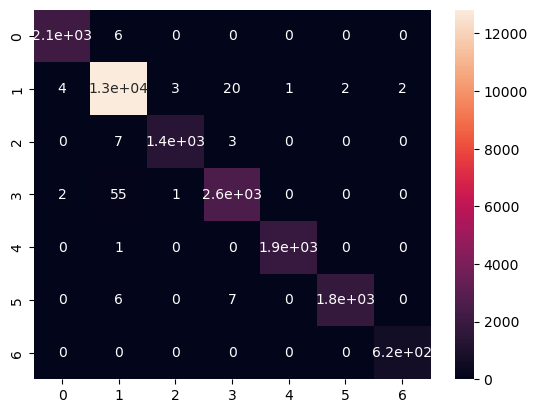

In [66]:
predicted_label  = model_rf.predict(training_features)
actual_label = np.array(outcome_label['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

#### 99.5% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [67]:
print('Accuracy on test dataset: ', accuracy_score(y_test, model_rf.predict(x_test)))

Accuracy on test dataset:  0.995144244501571


- Almost 100% accuracy on test set

### Support Vector Machine

In [68]:
svc = SVC()
model_svc = svc.fit(training_features,np.array(outcome_label['outcome_cd_bin']))

accuracy score: 0.762051677593521

classification report:
               precision    recall  f1-score   support

           0       0.70      0.63      0.66      2146
           1       0.77      0.97      0.85     12855
           2       0.89      0.95      0.92      1374
           3       0.79      0.39      0.52      2660
           4       0.70      0.42      0.52      1893
           5       0.69      0.32      0.43      1789
           6       0.68      0.53      0.60       620

    accuracy                           0.76     23337
   macro avg       0.75      0.60      0.64     23337
weighted avg       0.76      0.76      0.74     23337


confusion matrix:
 [[ 1342   448    50    36   114    98    58]
 [   44 12410    49   172    72    79    29]
 [   17    16  1307    19     3     0    12]
 [   41  1540     8  1039    16     7     9]
 [  231   729    26    18   792    60    37]
 [  152   969    14    17    62   564    11]
 [   91    95    13    14    73     4   330]]

preciso

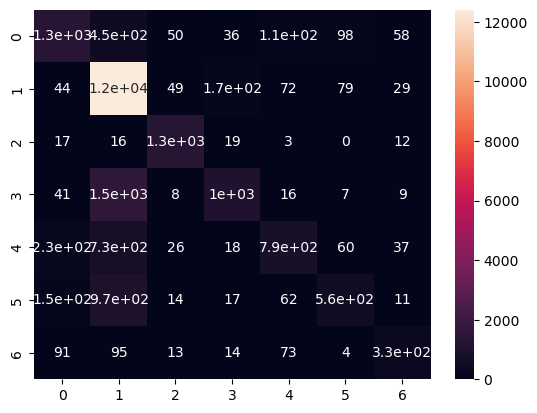

In [69]:
predicted_label  = model_svc.predict(training_features)
actual_label = np.array(outcome_label['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

#### 76.2% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [74]:
print('Accuracy on test dataset: ', accuracy_score(y_test, model_svc.predict(x_test)))

Accuracy on test dataset:  0.7596401028277635


- 75.96 % accuracy on test set

### K Nearest Neighbours:
    is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In [75]:
knn = KNeighborsClassifier()
model_knn = knn.fit(training_features,np.array(outcome_label['outcome_cd_bin']))

C:\Users\oyeni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy score: 0.834511719586922

classification report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      2146
           1       0.87      0.94      0.91     12855
           2       0.88      0.90      0.89      1374
           3       0.80      0.69      0.74      2660
           4       0.78      0.64      0.70      1893
           5       0.77      0.58      0.66      1789
           6       0.79      0.56      0.66       620

    accuracy                           0.83     23337
   macro avg       0.80      0.73      0.76     23337
weighted avg       0.83      0.83      0.83     23337


confusion matrix:
 [[ 1673   209    47    43    66    73    35]
 [  220 12131    33   226   110   115    20]
 [   32    62  1233    23     2    16     6]
 [  100   623    46  1846     8    32     5]
 [  155   375    16    64  1211    49    23]
 [  153   405    19    83    92  1032     5]
 [   81    78     9    14    63    26   349]]

preciso

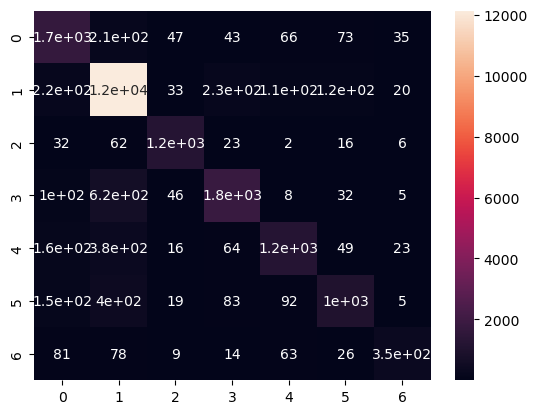

In [76]:
predicted_label  = model_knn.predict(training_features)
actual_label = np.array(outcome_label['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

#### Approximately 84% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [77]:
print('Accuracy on test dataset: ', accuracy_score(y_test, model_knn.predict(x_test)))

C:\Users\oyeni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on test dataset:  0.8347614967152243


- 83.48% accuracy on test set